## Investigating the vapor pressure of $H_2O$

By Hans Barstad Westbye, Sebastian Eide Aas and Edgar Fürst Hellsegg

### Introduction

For this project we will use numerical methods to calculate the vapor pressure, $p(T)$, of $H_{2}O$ to get as close to experimental values as possible. We know that the ideal gas law,

$$pV=nRT$$,

does not describe most gases. Here is the molar constant $R=8.314\text{ }\text{J}\text{mol}^{-1}\text{K}^{-1}$, $p$ is the pressure, $V$ is the volume, $n$ is the number of moles and $T$ is the temperature. A more realistic equation to describe real gases is van der Waals equation of state, given by 

$$p=\frac{RT}{V-b}-\frac{a}{V^2},$$

for $n=1$. This differs from the ideal gas law, because this equation deals with the fact that molecules are not point particles. The volume $V$ is therefore replaced by $V-b$. In addition to this, it also deals with the intermoleculare forces between particles, which gives a reduced pressure. Therefore, we also get $-\frac{a}{V^2}$ in the equation. 

As we know, the van der Waals equation and the Clausius-Clapeyrons equation,

$$\frac{dp}{dT}=\frac{\Delta S}{\Delta V}$$

can be used to find $p(T)$. When implementing Clausius-Clapeyrons equation, we assume that the gas follows the ideal gas law, and that $L$ is constant. Moreover, we assume that $\Delta V \approx V_g(T)$ as we are far away from $T_c$, so that $V_g(T)=\frac{RT}{p}$. If these assumptions are fulfilled, we can solve the equation analytically. This results in

$$\frac{dp}{dT}=\frac{Lp}{RT^2},$$

which is integrated and gives the analytical solution,

$$p(T) = p_0exp[\frac{L}{R}(\frac{1}{T_0}-\frac{1}{T})].$$

This solution as well as Clapeyrons equation will be used later in the tasks. In this project we will use experimental data to examine if we can use numerical methods on these equations to get them as close to the experimental data as possible. In the first task, we will se that even though van der Waals equation of state is an improvement from the ideal gas law, it has many flaws and gives high deviances from the experimental values. Therefore we will use more experimental data in task two and use different numerical approaches to try and find better models for $p(T)$ for $H_2O$.


### Task 1

The main focus in this task is to see how van der Waals equation of state behaves for different temperatures for $H_2O$. Even though this equation is an improvement compared to the ideal gas law, it has some weaknesses, as we will see later in the task. We will use Newton's method to solve a non-linear system of equations with respect to $V_g$ and $V_v$. $V_g$ and $V_v$ is the volume for water in gas- and liquid-state, respectively. These volumes will prove to be interesting to study when we look at a van der Waals isotherm later in the task. In addition to this, we will also plot a $p$-$V$ phase diagram and see where its different phases are. 

Since the main focus in this task is van der Waals equation of state, we want to calculate $a$, $b$ and $V_c$, to see how well the equation corresponds to their experimental value. The reason for this is that $a$ and $b$ are empiric, which means that the numerical value may differ from the experimental value. 

In [1]:
#import nescessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
#from scipy import optimize, interpolate #for jupyter notebook
import scipy #for deepnote
plt.rcParams['figure.figsize'] = [8,6]

In [2]:
#TASK 1a)

Tc = 647.096                   #Temperature in the critical point, unit K (Kelvin)
pc = 22.064*10**6              #Pressure in the critical point, unit Pa (Pascal)
Vc = 55.948*10**-6             #Volume in the critical point, unit m^3 (cubic meters) 
R = 8.314                      #Molar gas constant, unit J/Kmol (joule per kelvin-mol)

a = (27*R**2*Tc**2)/(64*pc)    #calculates a
b = (R*Tc)/(8*pc)              #calculates b
VcMolar = 3*b                  #calculates the critical molare volume

print(f'a = {a} Pa m^6') 
print(f'b = {b} m^3')
print(f'Critical molare volume = {VcMolar*10**6} mL')

a = 0.5534227552565905 Pa m^6
b = 3.047926568165337e-05 m^3
Critical molare volume = 91.43779704496012 mL


Experimental data from Engineering ToolBox, (2017) gives $a=5.537\text{ }\text{bar}\cdot\text{L}^2\cdot\text{mol}^{-1} = 0.5537\text{ }\text{Pa}\cdot\text{m}^6$. As we can see, this corresponds well to the calculated value. As for $b$, the experimental data gives $b=0.03049 \text{L}\cdot\text{mol}^{-1} = 3.049\cdot10^{-5}\text{ }\text{m}^{3}$, which also corresponds well to the experimental data. The critical molar volume from the assignment is $V_c = 55.948\text{ }\text{mL}$. The difference between this value and the one calculated is very large, as expected. This is because of the limitations of van der Waals equation of state, as there are no combinations of $a$ and $b$ which gives a better correspondance to $V_c$, when using two thermodynamic variables. 

Since we now have found that the calculated values of $a$, $b$ and $V_c$ are useable for the remainder of the task, we can look at how $p(V)$ behaves solving van der Waals equation of state analytically. We will use $T=T_c$, values for the volume in the interval $[75,300]\text{ }\text{mL}$ and look at the difference between this plot and the plot shown in the assignment. 

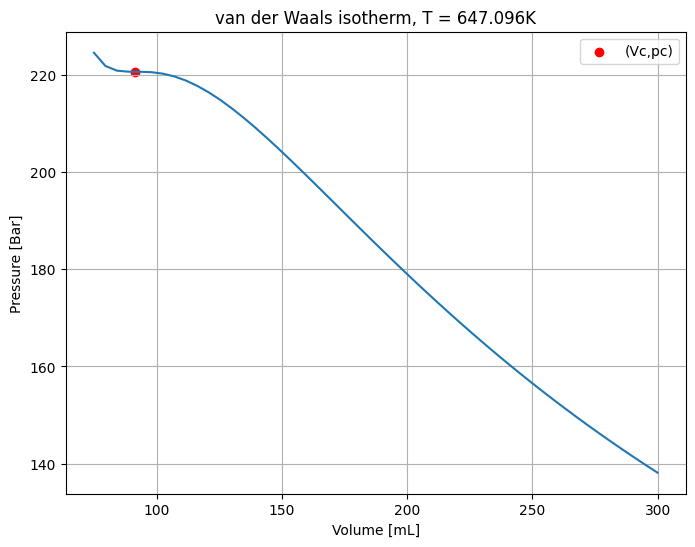

In [3]:
#TASK 1b)

def vanDerWaals(VArray, Tc):
    '''
    Calculates the pressure as a function of the volume using van der Waals equation. 

    Returns
    -------
    pArray : 1D-array
        the pressure for each volume.

    '''
    pArray = []                                                                 #empty list for the pressure
    for i in VArray:                                                            #calculates the pressure for each volume
        i = i*10**-6                                                            #converts from mL to cubic meters
        p = (R*Tc)/(i-b)-((a)/(i**2))
        p = p*10**-5                                                            #converts from Pa to bar
        pArray.append(p)
    return pArray

VArray = np.linspace(75,300)                                                    #volume from 75 mL to 300 mL
p = vanDerWaals(VArray, Tc)                                                     #gets the pressure

#plots p(V)
plt.plot(VArray,p)
plt.scatter(VcMolar*10**6,pc*10**-5, color = 'r', label = "(Vc,pc)")            #critical point, converts V to mL and p to Bar
plt.grid()
plt.title(f"van der Waals isotherm, T = {Tc}K")
plt.xlabel("Volume [mL]")
plt.ylabel("Pressure [Bar]")
plt.legend()
plt.show()

The difference between this plot and the plot in the assignment is that the pressure is much larger here than in the assignment. The slope of the curve is also much larger than the plot in the assignment, which means that the pressure decreases much faster in this plot. We also see that here we have constant pressure at $V=V_c$, whereas for the plot in the assignment, the pressure is increasing. 
By considering the kinetic theory of gases, the pressure of a gas is decided by the collisions of particles with the walls of the container. When we increase the volume, with the same amount of particles, there will be fewer collisions with the walls, and therefore less pressure, as can be observed from the plot. The plot in the assignment is therefore inaccaurate as the pressure increases when it should decrease. We can also see that the pressure is approximately constant at $(V_c,p_c)$. The critical point is the point where the phase transition between liquid and gas happens, and here the pressure is supposed to be constant, as we can observe from the plot. This means that the plot is accurate for the phase, which is expected as van der Waals equation of state works well at $T = T_c$. 

Since we later in this task will use Newtons method for severable variables, we will first apply Newtons method for one variable on the equation,

$$\sinh^2\frac{2c}{T_c}=1,$$ 

with $c=1\text{ }\text{K}$, to get to know how the method works and test it on an equation with a known solution. The critical temperature, $T_c$, can be found from this equation using Newtons method. The analytical solution to this equation is 

$$T_c=\frac{2c}{\ln(1+\sqrt2)},$$

which we want to compare the solution from Newtons method to. Newtons method for one variable is 

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},$$ 

which we will implement below. 

In [4]:
#1c)

def f(x):                                                                       #define the equation with x = Tc
    return (math.sinh(2*c/x))**2-1

def df(x):                                                                      #the derivative of f(x)
    return -(4*c*math.cosh(2*c/x)*math.sinh(2*c/x))/x**2

def newtonsMethod(f,df,start,tol,maxiter):
    '''
    Calculates the given equation using Newtons method 

    Parameters
    ----------
    f : equation
        the equation to solve.
    df : equation
        the derivative of the equation.
    start : float
        the initial guess.
    tol : float
        desired tolerance.
    maxiter : int
        max number of iterations.

    Returns
    -------
    x0 : float
        the solution of the equation.
    xSeq : 1D-array
        sequence of the solution for each iteration.

    '''
    x0 = start                                                                  #initial guess
    k = 0                                                                       #sets k to zero to initialize the loop
    xSeq = []                                                                   #empty list for the x-values
    while (f(x0)) > tol and k < maxiter:                                        #Newtons method
        k += 1                                                              
        x0 = x0-f(x0)/df(x0)
        xSeq.append(x0)                                                         #saves the x-sequence 
    
    return x0, xSeq

c = 1                                                                           #unit K (Kelvin)

# define the start values and tolerances
startValues = [1.0, 2.0, 3.0]                                                   #unit K (Kelvin)
tolerances = [10**-5, 10**-10, 10**-15]

# apply Newton's method for each combination of start value and tolerance
for startValue in startValues:
    for tolerance in tolerances:
        x0, xSeq = newtonsMethod(f, df, startValue, tolerance, 100)
        print(f"Start value: {startValue}, Tolerance: {tolerance}, Solution (Tc): {x0} K")

TcNew = (2*c)/math.log(1+math.sqrt(2))                                          #calculates Tc using the analytical solution
print(f'The analytic solution gives Tc = {TcNew} K')

Start value: 1.0, Tolerance: 1e-05, Solution (Tc): 2.2691852638079553 K
Start value: 1.0, Tolerance: 1e-10, Solution (Tc): 2.26918531421302 K
Start value: 1.0, Tolerance: 1e-15, Solution (Tc): 2.269185314213022 K
Start value: 2.0, Tolerance: 1e-05, Solution (Tc): 2.2691779337256586 K
Start value: 2.0, Tolerance: 1e-10, Solution (Tc): 2.2691853141665765 K
Start value: 2.0, Tolerance: 1e-15, Solution (Tc): 2.2691853142130216 K
Start value: 3.0, Tolerance: 1e-05, Solution (Tc): 3.0 K
Start value: 3.0, Tolerance: 1e-10, Solution (Tc): 3.0 K
Start value: 3.0, Tolerance: 1e-15, Solution (Tc): 3.0 K
The analytic solution gives Tc = 2.269185314213022 K


As we can see from the output, we get an identical solution using Newtons method, when the start value is beneath the solution, and the tolerance is low enough. As one can observe from from the output, the start value is far more crucial to the result than the tolerance. If the start value is larger than the solution, the function fails. We observe that the coice of tolerance is down to how many correct decimals are needed.

We now want to verify the order of convergence for Newtons method. This will be done by first calculating the error-sequence

$$e_i=|x_i-r|,$$

and then use this to calculate the sequence $p_i$, 

$$p_i=\frac{\log(\frac{e_i}{e_{i-1}})}{\log(\frac{e_{i-1}}{e_{i-2}})},$$

which approaches the convergence order $q$. 

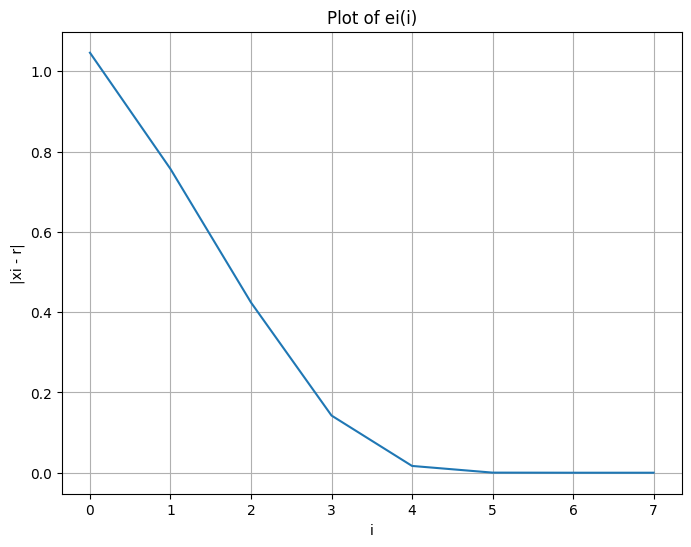

The order of convergence is q = 1.9993611545351548


In [5]:
#TASK 1d)

def e():
    '''
    Calculates the convergence-sequence ei

    Returns
    -------
    ei : 1D-array
        the sequence.

    '''
    ei = []                                                                     #empty list for the sequence
    for i in range(len(xSeq)-1):                                                #calculates the sequence
        e = abs(xSeq[i]-x0)
        ei.append(e)
    return ei

def p(ei):
    '''
    Calculates the sequence

    Parameters
    ----------
    ei : 1D-array
        the convergence-sequence.

    Returns
    -------
    pi : 1D-array
        the sequence.

    '''
    pi = []                                                                     #empty list for the sequence
    for i in range(1,len(ei)-1):                                                #calculates the sequence
        const1 = ei[i]/ei[i-1] 
        const2 = ei[i-1]/ei[i-2]
        pi.append(math.log(const1)/math.log(const2))
    return pi
        
#gets the values
x0, xSeq = newtonsMethod(f, df, 1, 10**-15, 100)
ei = e()                                                                        
i = np.linspace(0,len(ei)-1,len(ei))
pi = p(ei)

#plots the sequence
plt.plot(i,ei)
plt.grid()
plt.title("Plot of ei(i)")
plt.xlabel("i")
plt.ylabel("|xi - r|")
plt.show()

print(f'The order of convergence is q = {pi[-1]}')

As we can see from the output, we get the order of convergence to be approximately two. This confirms that Newtons method has a superlinear convergence. For this specific problem, this order of convergence is enough as we saw in $1c)$ that we get a identical match to the analytical solution.

We now want to implement Newtons method for several variables and find $V_v(T)$ and $V_g(T)$ by solving the equations

$$\frac{RT}{V_g-b}-\frac{a}{V_g^2}-\frac{RT}{V_v-b}+\frac{a}{V_v^2}=0$$

and

$$\frac{RT}{V_g-V_v}\ln\frac{V_g-b}{V_v-b}-\frac{a}{V_gV_v}-\frac{RT}{V_g-b}+\frac{a}{V_g^2}=0.$$

The multivariable version of Newtons method will not be presented here, but is presented in the assignment and codewise below. We will solve these equations over an interval of temperatures, $[274,647]\text{ }\text{K}$, and plot the result.

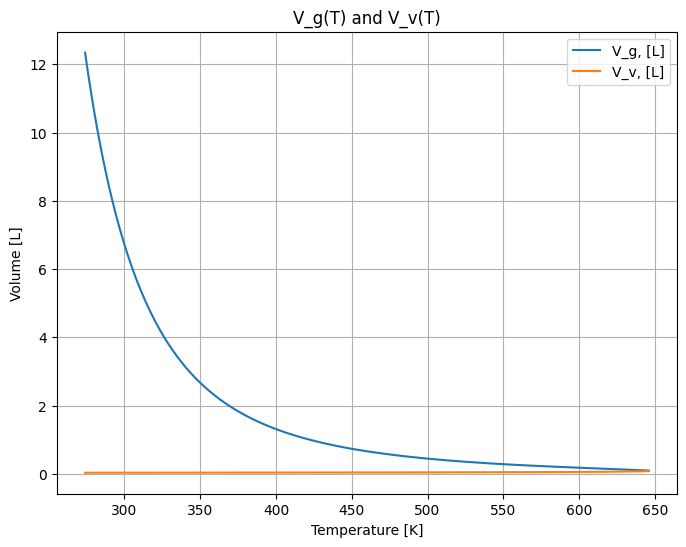

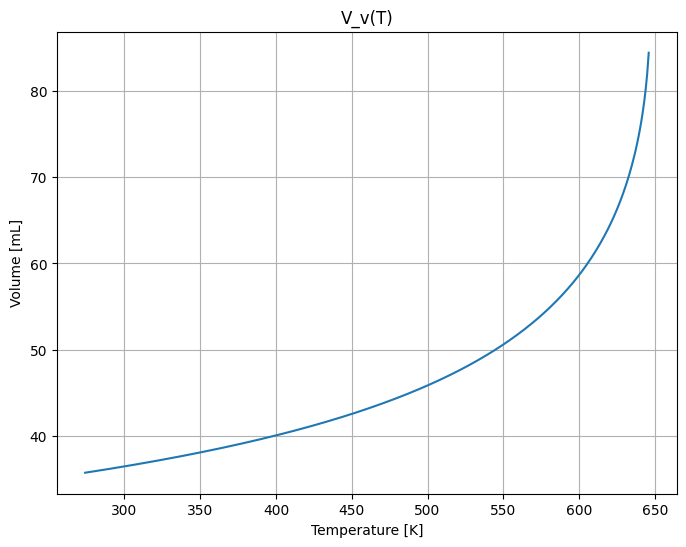

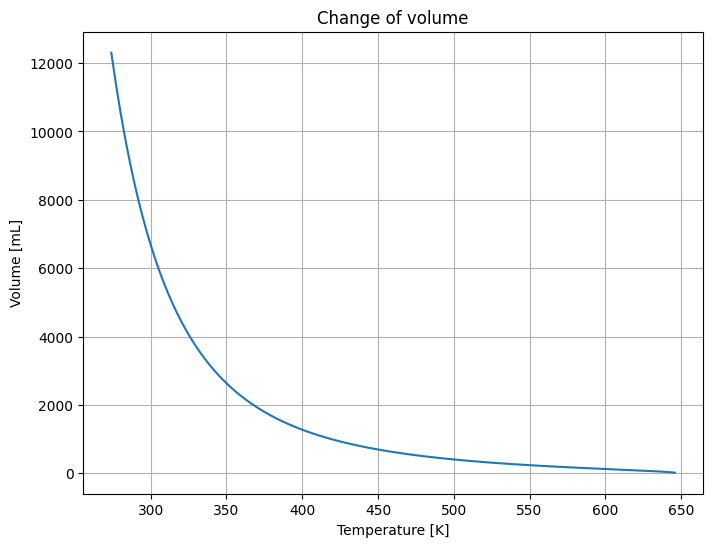

In [6]:
def jacobi(T,x,y):
    '''
    Calculates the Jacobi-matrix

    Parameters
    ----------
    T : 1D-array
        temperatures in unit Kelvin.
    x : float
        initial guess of the volume Vg, gas-volume.
    y : float
        initial guess of the volume Vv, liquid-volume.

    Returns
    -------
    jacobiMatrix : 2D-array
        the Jacobi-matrix.

    '''
    jacobiMatrix = np.ndarray(shape=(2,2))                                                                       #Creates the Jacobi-matrix and sets the elements
    jacobiMatrix[0][0] = 2*a/x**3 - R*T/(x-b)**2                                                                 #dfdx
    jacobiMatrix[0][1] = R*T/(y-b)**2 - 2*a/y**3                                                                 #dfdy
    jacobiMatrix[1][0] = a*(x-2*y)/(x**3*y) - R*T*(b-2*x+y)/((x-b)**2*(x-y)) - R*T*np.log((b-x)/(b-y))/(x-y)**2  #dgdx
    jacobiMatrix[1][1] = a/(x*y**2) + R*T/((b-y)*(x-y)) + R*T*np.log((b-x)/(b-y))/(x-y)**2                       #dgdy
    return jacobiMatrix

def vectorFunc(x,y,T):
    '''
    Calculates the value of the system of equations

    Parameters
    ----------
    x : float
        initial guess of the volume Vg.
    y : float
        initial guess of the volume Vv.
    T : 1D-array
        temperatures in unit Kelvin.

    Returns
    -------
    func : 2D-array
        contains the calculated value of each equation.

    '''
    f = R*T/(x-b) - a/x**2 - R*T/(y-b) + a/y**2                                                                  #calculates the value for each equation
    g = R*T/(x-y)*np.log((x-b)/(y-b)) - a/(x*y) - R*T/(x-b) + a/x**2
    func = np.array([[f],[g]])                                                                                   #sets the value in a 2D-array
    return func


def newtonMultiVariable(x,y,T):
    '''
    Calculates the system of equations using Newtons method for two variables

    Parameters
    ----------
    x : float
        initial guess of the volume Vg.
    y : float
        initial guess of the volume Vv.
    T : 1D-array
        temperatures in unit Kelvin.

    Returns
    -------
    x : float
        final value of the volume Vg.
    y : float
        final value of the volume Vv.
        
    '''
    func = vectorFunc(x, y, T)                                                                                    #gets the value to initialize the loop
    while np.linalg.norm(func) > tol:                                                                             #Newtons method for two variables
        jacobiMatrix = jacobi(T,x,y) 
        delta = np.linalg.solve(jacobiMatrix, -func)
        x += delta[0][0]
        y += delta[1][0]
        func = vectorFunc(x,y,T)
        
    return x, y


def getVolumes(temperatures, Vg, Vv):
    '''
    Calculates the volumes for each temperature

    Parameters
    ----------
    temperatures : 1D-array
        temperatures in unit K.
    Vg : 1D-array
        Vg in unit m^3.
    Vv : 1D-array
        Vv in unit m^3.

    Returns
    -------
    volumes : 2D-array
        contains the value for Vg and Vv for each temperature in unit L.

    '''
    volumes = np.ndarray(shape=(len(temperatures), 2))                                                            #empty array for the volumes
    volumes.fill(0)                                                                                               #fills it with zeros 
    for i in range(0, len(temperatures)):                                                                         #calculates the volumes and puts it in the array
        volumes[i][0], volumes[i][1] = newtonMultiVariable(Vg,Vv, temperatures[i])
        Vg = volumes[i][0]
        Vv = volumes[i][1]
        
    return volumes

#calculates the values
tol = 10**-5      
x, y, T = 12.4*10**-3, 35.3*10**-6, 273
Vg, Vv = newtonMultiVariable(x,y,T)
temperatures = np.arange(274, 647, 1)                                                                             #unit K
volumes = getVolumes(temperatures, Vg, Vv)

changeOfVolume = volumes[:, 0] - volumes[:, 1]

#plots V_g(T)
plt.plot(temperatures,volumes[:, 0]*10**3, label="V_g, [L]")                                                      #converts V to L
plt.plot(temperatures,volumes[:, 1]*10**3, label = "V_v, [L]")                                                    #converts V to L
plt.grid()
plt.title("V_g(T) and V_v(T)")
plt.xlabel("Temperature [K]")
plt.ylabel("Volume [L]")
plt.legend()
plt.show()

#plots V_v(T)
plt.plot(temperatures,volumes[:, 1]*10**6, label = "V_v, [mL]")                                                   #converts V to mL
plt.grid()
plt.title("V_v(T)")
plt.xlabel("Temperature [K]")
plt.ylabel("Volume [mL]")
plt.show()

#plots the change of volume 
plt.plot(temperatures, changeOfVolume*10**6, label = "Delta V, [mL]")                                             #converts V to mL
plt.grid()
plt.title("Change of volume")
plt.xlabel("Temperature [K]")
plt.ylabel("Volume [mL]")
plt.show()


We can see from the plot of $V_g(T)$ that the volume decreases as the temperature increases towards $T_c$. In the same temperature interval $V_v$ increases, but by a lot less than $V_g(T)$ decreases as can be observed from the first plot. These graphs tells us that an increase in temperature reduces the amount of volume that is needed for the substance to convert completely to gas. Furthermore, an increase in temperature increases the amount of volume the substance can occupy in its liquid phase.
As we can see from the $\Delta V$ plot the change of volume decreases significantly as the temperature increases. As the temperature increases towards $T_c$ the volumes are practically the same. Thus, at $T_c$ there is no phase transition over a certain volume interval, but we rather have a supercritical fluid where there is no distinction between the gas phase and the liquid phase. 

After calculating $V_g(T)$ and $V_v(T)$, we now want to calculate the vapor pressure for both volumes, and compare it to the experimental values. The experimental values are retrieved from Engineering ToolBox, (2018). 

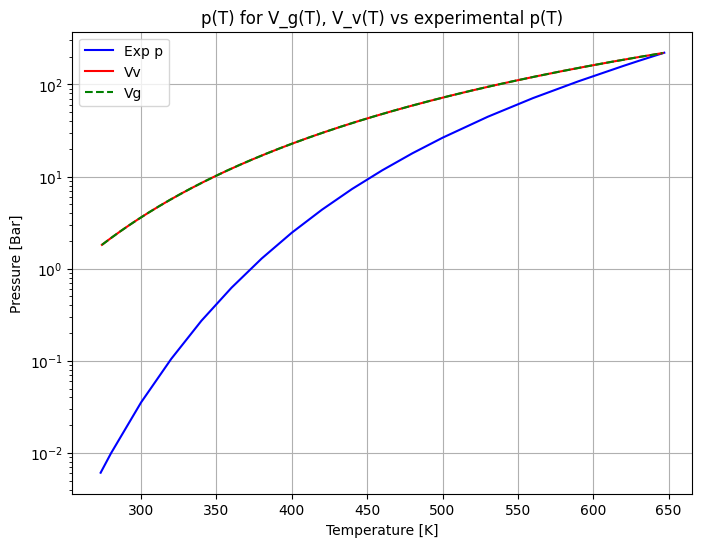

In [7]:
#TASK 1f)

#gets the data from file and convert it
pexp = open("p(T).txt", "r")
Tarray = []
parray = []
for j in pexp:
    values = j.split()
    values[0] = values[0].strip('\ufeff')                                                #removes the error BOM-error from the string
    values[1] = values[1].strip('\n')                                                    #removes white space so that we can convert to float
    values[1] = values[1].replace(',', '.')                                              #Converts , to . so that we can convert to float
    values[0] = values[0].replace(',', '.') 
    Tarray.append(float(values[0]))
    parray.append(float(values[1]))
pexp.close()

def calculatingPressure(volumes, index):
    '''
    Calculates the pressure using van der Waals equation of state.

    Parameters
    ----------
    volumes : 2D-array
        volume for Vg and Vv.
    index : int
        index for either Vg or Vv.

    Returns
    -------
    p : 1D-array
        contains the pressure for each temperature.

    '''
    p = np.zeros(len(volumes))                                                          #array for the pressure
    for i in range(len(volumes)):                                                       #calculate the pressure
        p[i] = R*temperatures[i]/(volumes[i,index] - b) - a/volumes[i,index]**2
    return p

#calculate p for Vg, Vv
pVg = calculatingPressure(volumes,0)
pVv = calculatingPressure(volumes,1)

#plots the result
plt.semilogy(Tarray, parray, label = "Exp p", c = 'b')
plt.semilogy(temperatures, pVv*10**-5, label = "Vv", c = 'r')                           #converts p from Pa to Bar
plt.semilogy(temperatures, pVg*10**-5, label = "Vg", c = 'g', linestyle = "dashed")     #converts p from Pa to Bar
plt.grid()
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Bar]")
plt.title("p(T) for V_g(T), V_v(T) vs experimental p(T)")
plt.legend()
plt.show()

The plot above is another example that illustrates that van der Waals equation of state does not accurately describe the pressure for temperatures below $T_c$. We see that the deviance between the experimental $p(T)$ and the calculated $p(T)$ becomes smaller as the temperature increases. The large deviance for low temperatures comes from the fact that van der Waals equation of state works best for a gas. Below $T_c$, we have a mix of liquid and gas, which makes van der Waals equation of state work poorly for temperatures below $T_c$. 

We now want to plot a van der Waals isotherm to see how well it quantatively describes the vapor pressure $p(T)$. In $1f)$ we saw how poorly van der Waals equation of state describes the vapor pressure at low temperatures, so it is interesting to see the result at a constant temperature.

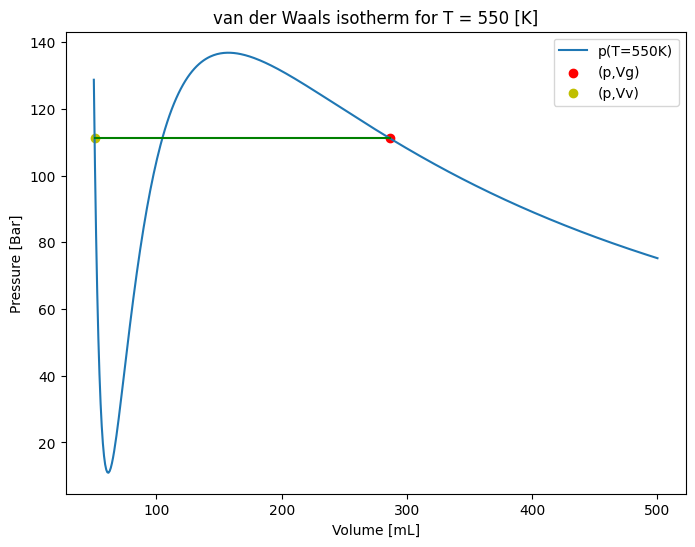

In [8]:
#TASK 1g)

#calculate the pressure at a constant temperature
V = np.linspace(50,500,500)                                                                         
T = 550               
pConstT = vanDerWaals(V,T)                                                                                           

#gets Vg and p(Vg)
VgConstTemp = volumes[T-274,0]
pVgConstTemp = R*T/(VgConstTemp - b) - a/(VgConstTemp)**2

#gets Vv and p(Vv)
VvConstTemp = volumes[T-274,1]
pVvConstTemp = R*T/(VvConstTemp - b) - a/(VvConstTemp)**2


plt.plot(V,pConstT, label = "p(T=550K)")                                                    
plt.scatter(VgConstTemp*10**6, pVgConstTemp*10**-5, c = 'r', label = "(p,Vg)")                          #plots the result, converts V to mL and p to Bar             
plt.scatter(VvConstTemp*10**6, pVvConstTemp*10**-5, c = 'y', label = "(p,Vv)")                          #plots the result, converts V to mL and p to Bar
plt.plot([VgConstTemp*10**6, VvConstTemp*10**6], [pVgConstTemp*10**-5, pVvConstTemp*10**-5], c='g')     #plots the result, converts V to mL and p to Bar
plt.xlabel("Volume [mL]")
plt.ylabel("Pressure [Bar]")
plt.title(f"van der Waals isotherm for T = {T} [K]")
plt.legend()
plt.show()

As we discussed in $1b)$, for an isotherm during a phase transition the temperature and the pressure is constant. On the interval $[V_v, V_g]$ we have a phase transition so we expect the pressure to be constant. As we can observe from the plot, the pressure is not constant. Thus the plot is unphysical on the interval $[V_v, V_g]$ when $T < T_c$, and van der Waals equation poorly describes the behaviour of the pressure at a phase transition.

Now we want to use the data from $1e)$ to create a $p$-$V$ phase diagram for $H_2O$, and discuss the result. 

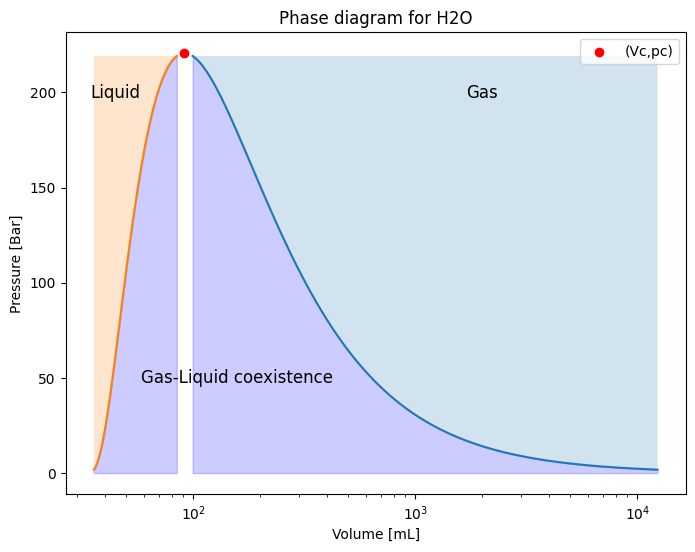

In [9]:
#TASK 1h)

#calculate the pressure and find Vg, Vv for each temperature
pVgArray = np.zeros(len(temperatures))
pVvArray = np.zeros(len(temperatures))
VgArray = np.zeros(len(temperatures))
VvArray = np.zeros(len(temperatures))
for i in range(len(temperatures)):
    VgArray[i] = volumes[temperatures[i]-274,0]
    VvArray[i] = volumes[temperatures[i]-274,1]
    pVgArray[i] = R*temperatures[i]/(VgArray[i]-b) - a/(VgArray[i])**2
    pVvArray[i] = R*temperatures[i]/(VvArray[i]-b) - a/(VvArray[i])**2

    

plt.semilogx(VgArray*10**6,pVgArray*10**-5)                                               #plots the result, converts V to mL and p to bar                                            
plt.semilogx(VvArray*10**6,pVvArray*10**-5)                                               #plots the result, converts V to mL and p to bar        
plt.scatter(VcMolar*10**6,pc*10**-5,c = 'r', label = "(Vc,pc)")                           #plots the result, converts V to mL and p to bar        
plt.fill_between(VgArray*10**6,pVgArray*10**-5, 0,color='blue', alpha=0.2)                #plots the result, converts V to mL and p to bar
plt.fill_between(VgArray*10**6,pVgArray*10**-5,pVgArray.max()*10**-5 , alpha=0.2)         #plots the result, converts V to mL and p to bar
plt.fill_between(VvArray*10**6,pVvArray*10**-5, 0,color='blue', alpha=0.2)                #plots the result, converts V to mL and p to bar
plt.fill_between(VvArray*10**6,pVvArray*10**-5,pVvArray.max()*10**-5 , alpha=0.2)         #plots the result, converts V to mL and p to bar
plt.text(10**(1.65), 200, 'Liquid', ha='center', va='center', fontsize=12)
plt.text(10**(2.2), 50, 'Gas-Liquid coexistence', ha='center', va='center', fontsize=12)
plt.text(10**(3.3), 200, 'Gas', ha='center', va='center', fontsize=12)
plt.ylabel("Pressure [Bar]")
plt.xlabel("Volume [mL]")
plt.title("Phase diagram for H2O")
plt.legend()
plt.show()

As we can see from the plot, on the left side of the curve we have $H_{2}O$ in its liquid phase. Under the curve, $H_{2}O$ exists in a gas-liquid coexistence. On the right side of the curve, $H_2O$  is in its gas phase. We have also plotted the point $(V_c,p_c)$ and above this point, water is a supercritic fluid. The gap between the curves is most likely a consequense from floating point errors when calculating numerically, since the numbers that we use to calculate are very small.

### Task 2

As we saw in task $1$, van der Waals equation of state is not very accurate in describing the phase transition from liquid form to water vapor. We now want to try to make models that lowers the deviances that occurs for temperatures below $T_c$. We will retrieve the experimental data from (Engineering ToolBox, (2018)) and (Engineering ToolBox, (2010)), and use different methods to make models of this data. Among these methods, we will use scipy's built in functions and Simpsons method. At the end of this task, we will plot every method we have used in the project and compare them. 


The first thing we do is to extract the experimental values for the gas volume, liquid volume and the heat of vaporization at different temperatures.

In [10]:
#TASK 2a)

#opens the file containing data for water in liquid form and convert the data 
Vv = open("Vv.txt", "r")
TArray = []
VvArray = []
for i in Vv:
    values = i.split()
    values[0] = values[0].strip('\ufeff')             #removes the error BOM-error from the string
    values[2] = values[2].replace(',', '.')           #Converts , to . so that we can convert to float
    TArray.append(float(values[0]))
    VvArray.append(float(values[2]))
Vv.close()
print(f'Temperature array for V_v: {TArray}')

#opens the file containing data for water vapor and convert the data
Vg = open("Vg.txt", "r")
VgArray = []
TArrayVg = []
for j in Vg:
    values = j.split(';')
    values[0] = values[0].strip('\ufeff')             #removes the error BOM-error from the string
    values[2] = values[2].strip(' \n')                #removes white space so that we can convert to float
    values[2] = values[2].replace(',', '.')           #Converts , to . so that we can convert to float
    VgArray.append(float(values[2]))
    TArrayVg.append(float(values[0]))
Vg.close()
print(f'Temperature array for V_g: {TArrayVg}')

#opens the file containing data for the heat of vaporazation and convert the data
L = open("L.txt", "r")
TArrayL = []
LArray = []
for k in L:
    values = k.split(';')
    values[1] = values[1].strip('\ufeff')             #removes the error BOM-error from the string
    values[2] = values[2].strip(' \n')                #removes white space so that we can convert to float
    values[1] = values[1].replace(',', '.') 
    values[2] = values[2].replace(',', '.')           #Converts , to . so that we can convert to float
    TArrayL.append(float(values[1]))
    LArray.append(float(values[2]))
L.close()
print(f'Temperature array for L: {TArrayL}')

Temperature array for V_v: [273.16, 280.0, 300.0, 320.0, 340.0, 360.0, 380.0, 400.0, 420.0, 440.0, 460.0, 480.0, 500.0, 530.0, 560.0, 590.0, 620.0, 630.0, 640.0, 647.1]
Temperature array for V_g: [273.16, 280.0, 300.0, 320.0, 340.0, 360.0, 380.0, 400.0, 420.0, 440.0, 460.0, 480.0, 500.0, 530.0, 560.0, 590.0, 620.0, 630.0, 640.0, 647.1]
Temperature array for L: [273.16, 275.15, 277.15, 283.15, 287.15, 291.15, 293.15, 298.15, 303.15, 307.15, 313.15, 317.15, 323.15, 327.15, 333.15, 343.15, 353.15, 363.15, 369.15, 373.15, 383.15, 393.15, 413.15, 433.15, 453.15, 473.15, 493.15, 513.15, 533.15, 553.15, 573.15, 593.15, 613.15, 633.15, 647.096]


As we can clearly se from the three arrays for the temperature, only Vv and Vg are evaluated at the same temperature. There are some discrepancies between the temperatures of Vv and Vg, and the temperature of L, however, they start and finish at nearly the same value. The unit for the volume is changed to liters. Since Vv and Vg are evaluated at the same temperature, we use $\text{TArray}$ for the remainder of the task.

The next step is to describe the data extracted in the last task, as continuous functions. One way to find a good representation is to use the built in $\text{optimize.curve_fit}$ function. However, to use this function one needs to define the function that we want to optimize. Instead of blindly testing different functions and seeing how they compare to the original data, we will perform a regression analysis on the data extracted in the previous task. 

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


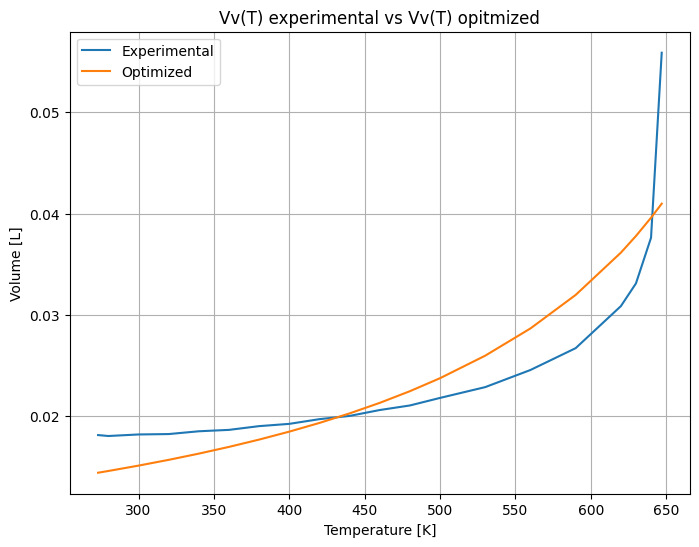

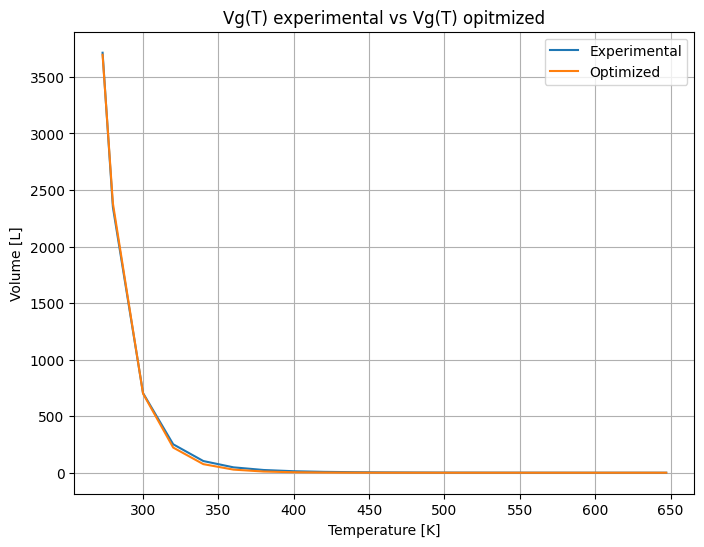

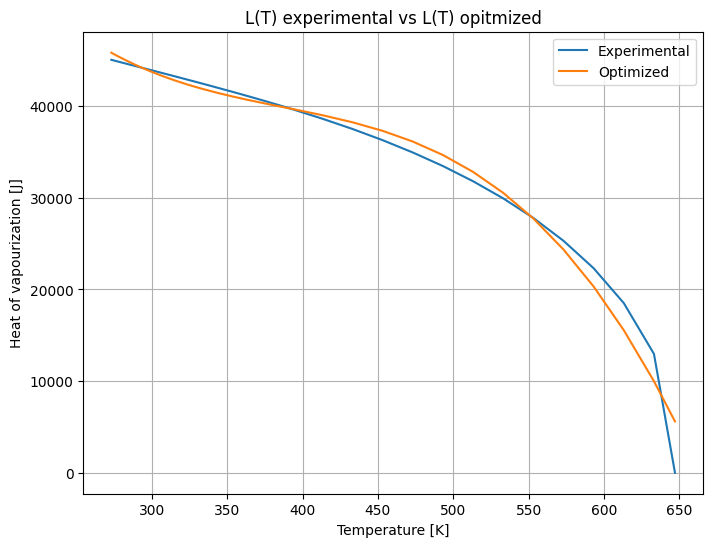

In [40]:
#TASK 2b)

#converts it to arrays to plot them below
TArray = np.array(TArray)
VvArray = np.array(VvArray)
VgArray = np.array(VgArray)
TArrayL = np.array(TArrayL)
LArray = np.array(LArray)

def funcVv(TArray,a,b,c,d):                                                                    #Defines the function we got from the regression analysis
    return (a*-0.00003)/(1-1.003*b*math.e**(c*-0.0000035*TArray))                              

firstVv, secondVv = scipy.optimize.curve_fit(funcVv, TArray, VvArray)                          #Optimizes the function

def funcVg(TArray,a,b):                                                                        #Defines the function we got from the regression analysis
    return a*86*10**(30)*TArray**(-11.8*b)                  

firstVg, secondVg = scipy.optimize.curve_fit(funcVg, TArray, VgArray, maxfev=1000000)          #We had to increase the maxfev so that the funtion did not time out

def funcL(TArrayL,a,b,c,d):                                                                    #Defines the function we got from the regression analysis
    return -a*0.0008*TArrayL**3 + b*0.8373*TArrayL**2 -c*343*TArrayL + 92460*d

firstL, secondL = scipy.optimize.curve_fit(funcL, TArrayL, LArray)                             #Optimizes the function


#plots each original and optimized function
plt.plot(TArray, VvArray, label = "Experimental")
plt.plot(TArray, funcVv(TArray, *firstVv), label = "Optimized")
plt.title("Vv(T) experimental vs Vv(T) opitmized")
plt.ylabel("Volume [L]")
plt.xlabel("Temperature [K]")
plt.grid()
plt.legend()
plt.show()
plt.plot(TArray, VgArray, label = "Experimental")
plt.plot(TArray, funcVg(TArray, *firstVg), label = "Optimized")
plt.title("Vg(T) experimental vs Vg(T) opitmized")
plt.ylabel("Volume [L]")
plt.xlabel("Temperature [K]")
plt.legend()
plt.grid()
plt.show()
plt.plot(TArrayL, LArray, label = "Experimental")
plt.plot(TArrayL, funcL(TArrayL, *firstL), label = "Optimized")
plt.title("L(T) experimental vs L(T) opitmized")
plt.ylabel("Heat of vapourization [J]")
plt.xlabel("Temperature [K]")
plt.legend()
plt.grid()
plt.show()

The regression analysis gave three functions that we implemented above, and then optimized. As one can observe from the plot, the fitted functions are reasonably close to the plot of the original data set. We see that the first opitimized function did not fit as well as the others, but we will use it for the remainder of the task as we will compare it to other numerical approaches later. Below are three images of our regression analysis: 

![Skjermbilde%202023-03-27%20kl.%2015.38.52.png](attachment:Skjermbilde%202023-03-27%20kl.%2015.38.52.png)

![Skjermbilde%202023-03-27%20kl.%2015.40.28.png](attachment:Skjermbilde%202023-03-27%20kl.%2015.40.28.png)

![Skjermbilde%202023-03-27%20kl.%2015.40.57.png](attachment:Skjermbilde%202023-03-27%20kl.%2015.40.57.png)

We will now use Simpsons method to integrate Clapeyrons equation, 

$dp = \frac{L(T)}{T\cdot[V_g(T)-V_v(T)]}dT.$

We will use the functions from the last task to complete the integration. We will integrate for every temperature on the interval $[274, 647]\text{ }\text{K}$. Moreover, we will plot $p(T)$ and compare the plot to the experimental pressure curve.

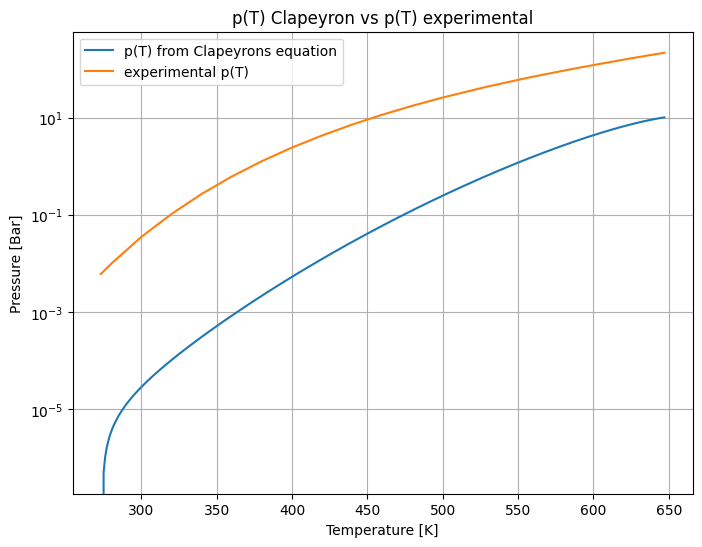

In [46]:
#Task 2c)


def f(T):                                                                                 #The function we want to integrate
    return funcL(T,*firstL)/(T*(funcVg(T, *firstVg)) - funcVv(T, *firstVv))    

def simpsonsMethod(endValue, startValue, n):  
    '''
    Calculates the integral using Simpsons method

    Parameters
    ----------
    endValue : 1D-array
        final points of integration.
    startValue : int
        start point of integration.
    n : int
        number of divisions of the area to integrate.

    Returns
    -------
    pT : 1D-array
         the pressure.

    '''                
    pT = []                                                                              #empty array to put the pressure in        
    for i in endValue:                                                                   #Simpsons method       
        h = (i-startValue)/n
        S = f(startValue)
        for j in range(1,int(n/2)+1):                                           
            x = startValue+(2*j-1)*h
            S = S + 4*f(x)
        for k in range(1, int(n/2)):
            x = startValue+2*k*h
            S = S + 2*f(x)
        S = S + f(i)
        S = h*S/3
        S = S*10**-5                                                                     #converts from Pa to bar
        pT.append(S)
    return pT

endValue = np.linspace(274,647,647-274)                                                  #linspace in unit K, so that we integrate for every T in the interval
startValue = 274                                                                         #start value in unit K
n = 10000                                                                                #number of divisions of the area to integrate
pT = simpsonsMethod(endValue, startValue, n)                                             #gets the values

#plots the result
plt.semilogy(endValue, np.array(pT), label = "p(T) from Clapeyrons equation")
plt.semilogy(Tarray, parray, label = "experimental p(T)")
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Bar]")
plt.title("p(T) Clapeyron vs p(T) experimental")
plt.legend()
plt.grid()
plt.show()

From the plot, one can observe that there is relatively large deviation between the experimental curve and the curve from Clapeyrons equation. This may be a result of inaccuracies in the functions we chose in task $2b)$. In addition to this, we know that $L$ is evaluated at different temperatures than $V_g$ and $V_v$. This could also affect the result, since we use $L(T)$ when calculating the pressure using Clapeyrons equation. We see that the deviance between the two curves also decrease for increasing $T$.

An alternative to the optimize function is to interpolate the data set with cubic splines. In the code below we have interpolated the experimental data for gas volume, liquid volume and the heat of vaporization using scipy's $\text{interpolate.CubicSpline}$. Along with the interpolated functions, we will plot the functions we found in task $2b)$. After studying the plots, we will conclude which method produces the best results.


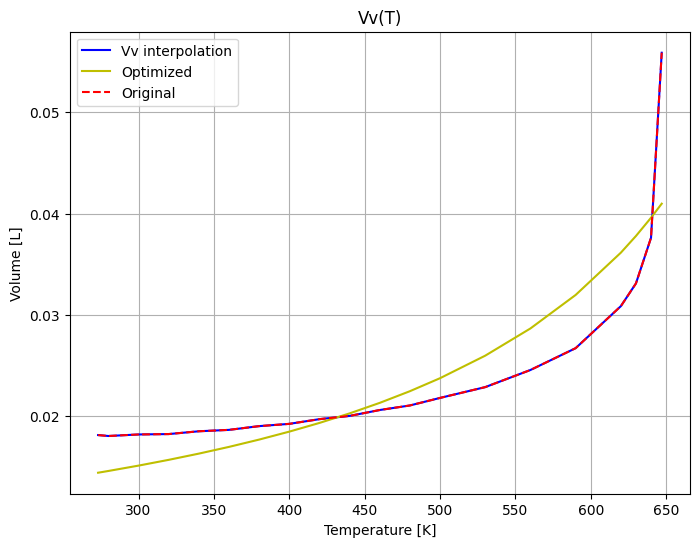

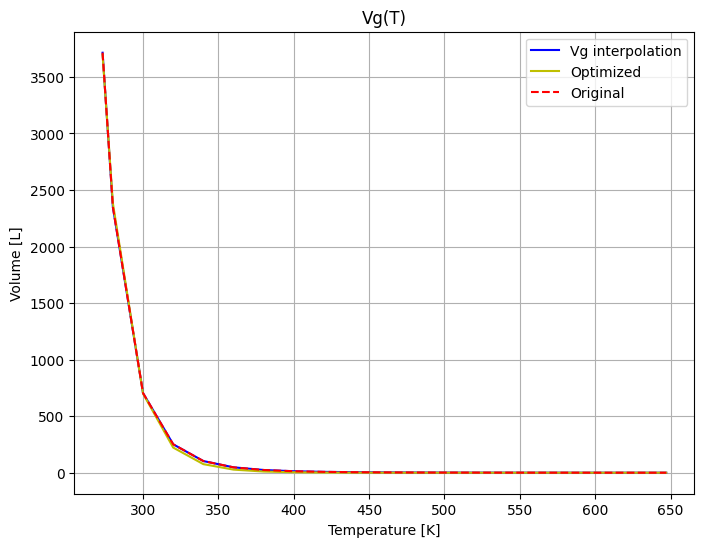

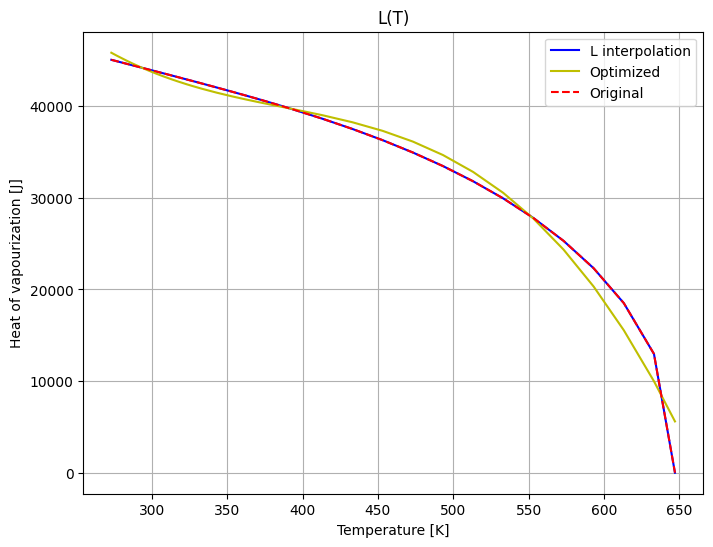

In [13]:
#TASK 2d)

#calculate the functions using scipy's cubic spline
VvFunc = scipy.interpolate.CubicSpline(TArray, VvArray)
VgFunc = scipy.interpolate.CubicSpline(TArray, VgArray)
LFunc = scipy.interpolate.CubicSpline(TArrayL, LArray)

#plots each function to the optimized and the original
plt.plot(TArray, VvFunc(TArray),label = "Vv interpolation", c = 'b')
plt.plot(TArray, funcVv(TArray, *firstVv), c = 'y', label = "Optimized")
plt.plot(TArray, VvArray, label = "Experimental", c = "r", linestyle = "dashed")
plt.title("Vv(T) interpolated vs Vv(T) opitmized vs Vv(T) experimental")
plt.ylabel("Volume [L]")
plt.xlabel("Temperature [K]")
plt.legend()
plt.grid()
plt.show()
plt.plot(TArray, VgFunc(TArray),label = "Vg interpolation", c = 'b')
plt.plot(TArray, funcVg(TArray, *firstVg), c = 'y', label = "Optimized")
plt.plot(TArray, VgArray, label = "Experimental", c = "r", linestyle = "dashed")
plt.title("Vg(T) interpolated vs Vg(T) opitmized vs Vg(T) experimental")
plt.ylabel("Volume [L]")
plt.xlabel("Temperature [K]")
plt.legend()
plt.grid()
plt.show()
plt.plot(TArrayL, LFunc(TArrayL),label = "L interpolation", c = 'b')
plt.plot(TArrayL, funcL(TArrayL, *firstL), c = 'y', label = "Optimized")
plt.plot(TArrayL, LArray, label = "Experimental", c = "r", linestyle = "dashed")
plt.title("L(T) interpolated vs L(T) opitmized vs L(T) experimental")
plt.legend()
plt.ylabel("Heat of vapourization [J]")
plt.xlabel("Temperature [K]")
plt.grid()
plt.show()

Above is a visual representation of both interpolation methods along with the experimental data. One can conclude that for $V_v$ and $L$ the interpolation by cubic splines is far superior to the optimize function. On the other hand, for $V_g$ there is almost no difference between the three graphs, because the curve fit in task $2b)$ was vastly more accurate than for $V_v$ and $L$. Taking this into account one can conclude that for our approach to these exercises, interpolation by cubic splines is superior for $V_v$ and $L$, but the difference between the interpolation methods for $V_g$ is close to negligible. 

We will now redo the integration we did in task $2c)$, however, we will use the interpolation from task $2d)$ to perform the integration. Next, we will plot the coexistence curve $p(T)$ , along with the experimental data as a function of $T$. Furthermore, we will discuss which factors that cause the deviation between the graphs. 

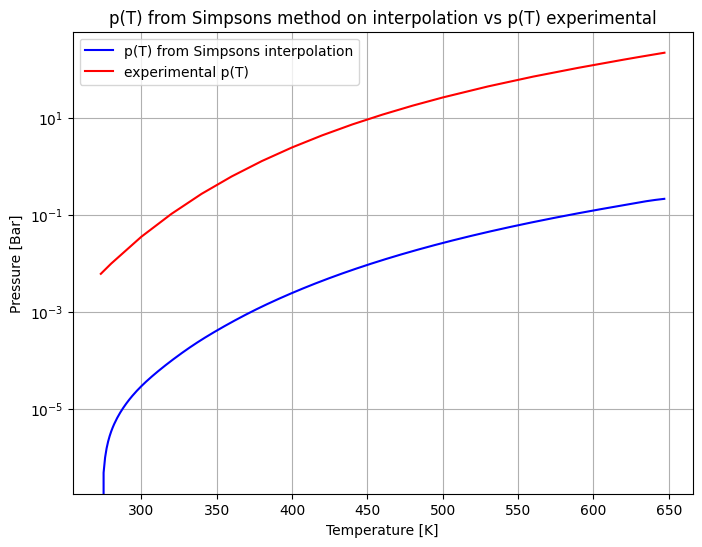

In [49]:
#TASK 2e)

def f(T):                                                                                           #the function we want to integrate 
    return LFunc(T)/(T*(VgFunc(T) - VvFunc(T)))

pressureValues = simpsonsMethod(endValue,startValue,1000)

#plots the result
plt.semilogy(endValue, pressureValues, label = "p(T) from Simpsons interpolation", c = 'b')         #converts p from Pa to Bar
plt.semilogy(TArray, parray, label = "experimental p(T)", c = 'r')
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Bar]")
plt.title("p(T) from Simpsons method on interpolation vs p(T) experimental")
plt.legend()
plt.grid() 
plt.show()

Even though the graph of the interpolation does not match very well with the experimental data, when we study the shape of the graph from interpolation, we observe that the shape of the graph is more accurate in comparison to the experimental values, than the graph from Simpsons method in $2c)$. So one can actually conclude that even though the discrepancy in value is larger for interpolation, the shape convinces us that the interpolation method is more accurate. There could also be some uncertainty of measurement in the experimental data retrived from the sources. We also know that for Simpsons method, the error depends on $n$. If $n$ is chosen relatively large, the error would decrease significantly. Moreover, we calculate with incredibly small numbers which could outweigh the precision of the computer, giving floating point errors in the calculations. From the plot, we also observe that the plot of Simpsons method using interpolation data gives a very low pressure in the beginning. This could indicate that the interpolation is not valid for the start of the temperature-interval, but we see that from $T\approx300 \text{K}$ that the shape of the curve resembles the experimental data. 

As a final concluding exercise, we will plot $p(T)$ for all the methods we have implemented throughout the project. Along with this, we will also plot the analytical solution of Clapeyrons equation. These plots will give a visual representation of how $p(T)$ varies depending on the equation and method of solving.

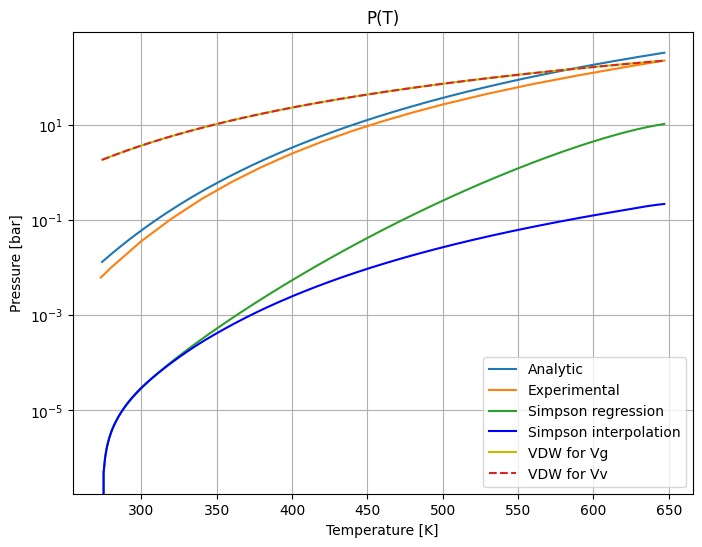

In [50]:
#TASK 2f)

def clapeyron(p0,L,T0):  
    '''
    Caculates the analytical solution of clapeyrons equation

    Parameters
    ----------
    p0 : float
        reference pressure.
    L : int
        heat of vaporaziation.
    T0 : float
        reference temperature.

    Returns
    -------
    pT : 1D-array
        contains the pressure.

    '''         
    pT = []                                                                     #empty list to put the pressure in
    for i in T:                                                                 #calculates the pressure
        p = p0*math.e**(L/R*(1/T0-1/T))
        pT.append(p)
    return pT


T = np.linspace(274,647, 647-274)
p0,T0 = 0.01, 270                                                               #defines the reference point (p0,T0)
L = 40000                                                                       #defines an L that makes the analytic close to the experimental
pTClapeyron = clapeyron(p0,L,T0)                                                #gets the values


#plots the result
plt.plot(T, pTClapeyron[1], label = "Analytic")
plt.semilogy(Tarray, parray, label = "Experimental")
plt.plot(endValue, pT, label = "Simpson regression")
plt.semilogy(endValue, pressureValues, label = "Simpson interpolation", c = 'b')  
plt.semilogy(temperatures,pVgArray*10**-5, label = "VDW for Vg", c="y") 
plt.semilogy(temperatures,pVvArray*10**-5, label = "VDW for Vv",linestyle = "dashed") 
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [bar]")
plt.title("P(T)")
plt.legend()
plt.grid()
plt.show()

As one can observe from the plot, the graph for the Simpsons method on regression, and Simpsons method on interpolation sticks out as the worst approximations as their discrepancy is by far the largest from the other methods. In the case of regression, one can argue that this large difference may be a result of our implemented functions (from the regression analysis) not being accurate enough. Simpsons method relies on the fact that the function it integrates is correct. Since our function is a combination of the functions from the regression analysis, this may cause large errors in our approximation. For interpolation, we observe that the functions created, actually produce a result farther from the experimental values than Simpsons for regression. But, as we discussed in $2e)$ the shape of the function outwheighs the difference in values. Furthermore, one can observe that the graph for van der Waals equation, the analytic function (Clayperons equation) and the experimental data are relatively close at $T = T_c$. This is supported by the fact that van der Waals equation provides a better result the closer one gets to $T_c$. 

### Conclusion

In this project we have studied $p(T)$ using different numerical approaches, with van der Waals equation of state and Clapeyrons equation as the foundation. We saw that van der Waals equation struggles with representing $p(T)$ at temperatures below $T_c$, but for temperatures above, it is a good way of describing the pressure. From the different numerical approaches, we see from the plot in $2f)$ that $p(T)$ is best described using Simpsons method on the interpolated data. This result comes from the fact that this curve better resembles the experimental data. Even though Simpsons method for regression and van der Waals equation of state gives a better result at a single point, we can conclude that the overall best approach is Simpsons method for interpolation. 

### References

1. Engineering ToolBox, (2018). Water - Properties at Gas-Liquid Equilibrium Conditions. [online] Available at: https://www.engineeringtoolbox.com/water-properties-temperature-equilibrium-pressure-d_2099.html [Accessed 25/03-23].

2. Engineering ToolBox, (2010). Water - Heat of Vaporization vs. Temperature. [online] Available at: https://www.engineeringtoolbox.com/water-properties-d_1573.html [Accessed 25/03-23].

3. Engineering ToolBox, (2017). Non-ideal gas - Van der Waal's Equation and Constants. [online] Available at: https://www.engineeringtoolbox.com/non-ideal-gas-van-der-Waals-equation-constants-gas-law-d_1969.html [Accessed 26/03-23].

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3b2a439-d6e0-4ca1-ac4f-8d28b6a39998' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>